# Section 3: Training a Supervised Learning Model
### Lecture 8: Training a Baseline Logistic Regression Model using scikit-learn
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature <b>'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise</b>.



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../Modulo2/creditcard.csv.zip')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [15]:
# random_state = 42 reproduce this experiment 
# stratify, imbalanced nature of our data, we're going to have very few positive instances of our target variable.
# preseved when you split into the training and test set, meaning that you will be guaranteed instances of fraud in both cases. 
# training and testing fraud =1

In [16]:
from sklearn.linear_model import LogisticRegression

#treinar o modelo de regressão
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [17]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
set(y_pred) # prever se é fraude 1 ou não 0

{0, 1}

In [20]:
import numpy as np
np.unique(y_pred, return_counts=True)


(array([0, 1]), array([28441,    40]))

## Introducing the Confusion Matrix
- Acts as a cross section between the ground truth and the predictions that the trained model makes
- In a binary classification context, the confusion matrix reports on the classification performance of the model:
    - True negatives - actually non-fraudulent and correctly classified as non-fraudulent
    - False positives - actually non-fraudulent but incorrectly classified as fraud
    - False negatives - actually fraud but incorrectly classified as being non-fraudulent
    - True positives - actually fraud and correctly classified as fraud
- We're trying to detect fraud, so the "positive" relates to fraud while "negative" refers to non-fraudulent.
- "True" relates to correct predictions, whereas "false" refers to incorrect predictions.
- Many performance metrics are derived from the elements of the confusion matrix (Section 4), therefore it is foundational for understanding how to measure performance for classification problems.

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28426,     6],
       [   15,    34]])

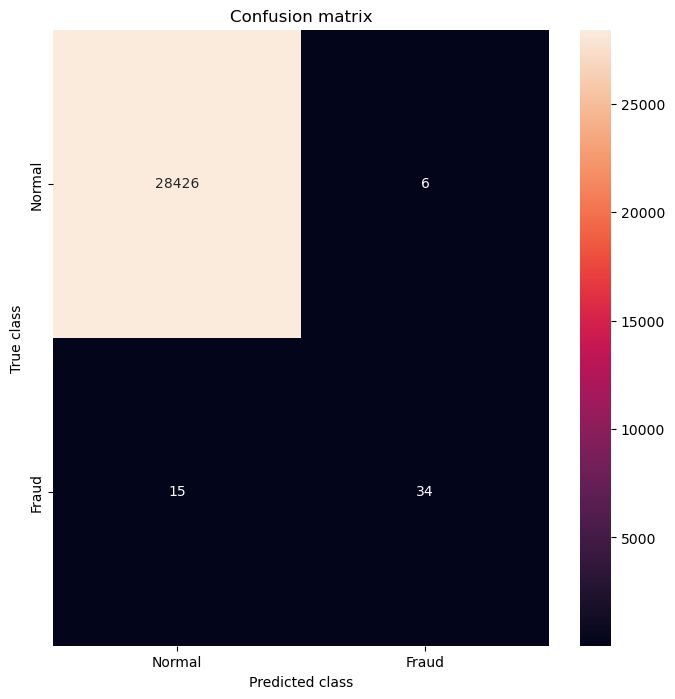

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()